In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
from numpy.linalg import inv
import pandas as pd
import pysindy as ps
import random
import seaborn as sns

%matplotlib inline
plt.rcParams["font.family"] = 'Arial'

In [2]:
df = pd.read_csv('dataset/dataset_different_angle.csv')
df_norm = (df - df.mean()) / df.std()
df

,Contact_length,Operation_angle,Maximum_displacement,Maximum_displacement.1
0,55,0,184,353
1,55,15,141,303
2,55,30,124,257
3,55,45,97,185
4,55,60,85,136
5,55,75,74,71
6,45,0,245,385
7,45,15,175,325
8,45,30,154,280
9,45,45,120,212


[None, None]

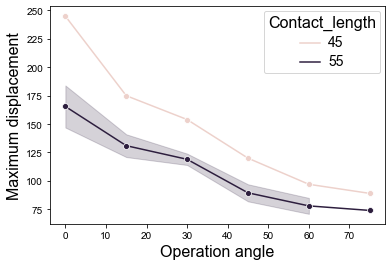

In [3]:
fig = plt.figure()
ax = sns.lineplot(data=df, x='Operation_angle', y='Maximum_displacement', hue='Contact_length', marker='o')
plt.xlabel('Operation angle', fontsize=16)
plt.ylabel('Maximum displacement', fontsize=16)
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='16')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df_train, df_test = train_test_split(df_norm, test_size=0.2, random_state=5)
X_train, y_train = df_train[['Contact_length', 'Operation_angle']], df_train[['Maximum_displacement']]
X_test, y_test = df_test[['Contact_length', 'Operation_angle']], df_test[['Maximum_displacement']]

regr = RandomForestRegressor(max_depth=3).fit(X_train, y_train)

pred_test = regr.predict(X_test)

r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)
print(X_train.shape, y_train.shape)
print(r2_train, r2_test)
print(X_test, '\n', pred_test)
print(y_test)

(13, 2) (13, 1)
0.9279940497719157 0.9436910867660917
    Contact_length  Operation_angle
5         0.716498         1.563150
1         0.716498        -0.798943
10       -1.313579         0.972627
2         0.716498        -0.208420 
 [-0.9099269   0.27554437 -0.6679615  -0.16542601]
    Maximum_displacement
5              -1.100718
1               0.353711
10             -0.601436
2              -0.015323


<ipython-input-4-782c7a820d08>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr = RandomForestRegressor(max_depth=3).fit(X_train, y_train)


In [8]:
X_target_list = []

for i in range(45, 55):
    X_target_list.append([(i - df.mean()[0]) / df.std()[0], 0])

X_target = np.array(X_target_list)
pred_X_target = regr.predict(X_target)
pred_y_target = pred_X_target * df.std()[2] + df.mean()[2]

Text(0, 0.5, 'Maximum_displacement')

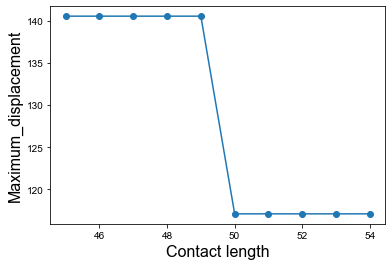

In [11]:
fig = plt.figure()
plt.plot(X_target[:,0] * df.std()[0] + df.mean()[0], pred_y_target)
plt.scatter(X_target[:,0] * df.std()[0] + df.mean()[0], pred_y_target)
plt.xlabel('Contact length', fontsize=16)
plt.ylabel('Maximum_displacement', fontsize=16)

In [10]:
df.describe()

,Contact_length,Operation_angle,Maximum_displacement,Maximum_displacement.1
count,17.000000,17.000000,17.000000,17.000000
mean,51.470588,35.294118,124.705882,223.117647
std,4.925922,25.401193,46.066209,97.844828
min,45.000000,0.000000,71.000000,71.000000
25%,45.000000,15.000000,89.000000,136.000000
50%,55.000000,30.000000,120.000000,230.000000
75%,55.000000,60.000000,147.000000,303.000000
max,55.000000,75.000000,245.000000,385.000000
